In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import calendar
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data_file/Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Splitting train-test
train, test = train_test_split(data, train_size=0.7, random_state=100)
print('% train- ', round(train.shape[0]/data.shape[0], 3))
print('% test- ', round(test.shape[0]/data.shape[0], 3))

% train-  0.7
% test-  0.3


In [4]:
#Getting overview of a dataframe using describe function
train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6468.000000,6468.000000,6369.000000,6468.000000,6369.000000,3493.000000,3493.000000
mean,617186.001546,0.381262,3.474957,483.875850,2.353143,14.316061,16.361294
std,23372.003514,0.485734,5.323608,546.565663,2.179257,1.388163,1.815995
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596516.250000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615720.500000,0.000000,3.000000,246.000000,2.000000,14.000000,16.000000
75%,637348.750000,1.000000,5.000000,926.500000,3.000000,15.000000,18.000000
max,660728.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
print("Checking data info")
print(train.info())
print("\n\nChecking Nulls in the data")
print(round(train.isnull().sum()/train.shape[0] *100, 2))

Checking data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    6468 non-null   object 
 1   Lead Number                                    6468 non-null   int64  
 2   Lead Origin                                    6468 non-null   object 
 3   Lead Source                                    6441 non-null   object 
 4   Do Not Email                                   6468 non-null   object 
 5   Do Not Call                                    6468 non-null   object 
 6   Converted                                      6468 non-null   int64  
 7   TotalVisits                                    6369 non-null   float64
 8   Total Time Spent on Website                    6468 non-null   int64  
 9   Page Views Per Visit          

In [6]:
# Find the % nulls in all the columns
def get_nulls_count(data_df):
    """
    Funtion to find the null counts and %nulls for all the columns of a given dataframe
    
    @param data_df: DataFrame
    """
    nulls_count = data_df.isnull().sum().reset_index().rename(columns={'index': 'columns', 0: 'null_count'})
    nulls_count['%_nulls_count'] = nulls_count['null_count']/data_df.shape[0] * 100
    return nulls_count

nulls_count = get_nulls_count(train.copy())

In [7]:
nulls_tmp = nulls_count[nulls_count['%_nulls_count']!=0]
nulls_tmp

,columns,null_count,%_nulls_count
3,Lead Source,27,0.417440
7,TotalVisits,99,1.530612
9,Page Views Per Visit,99,1.530612
10,Last Activity,74,1.144094
11,Country,1727,26.700680
12,Specialization,1019,15.754484
13,How did you hear about X Education,1554,24.025974
14,What is your current occupation,1893,29.267161
15,What matters most to you in choosing a course,1906,29.468151
24,Tags,2346,36.270872


In [8]:
_tmp = nulls_tmp[nulls_tmp['%_nulls_count'] > 40]
print("Number of columns having more than 40% null values: ", _tmp.shape[0])
_tmp

Number of columns having more than 40% null values:  5


,columns,null_count,%_nulls_count
25,Lead Quality,3367,52.056277
30,Asymmetrique Activity Index,2975,45.995671
31,Asymmetrique Profile Index,2975,45.995671
32,Asymmetrique Activity Score,2975,45.995671
33,Asymmetrique Profile Score,2975,45.995671


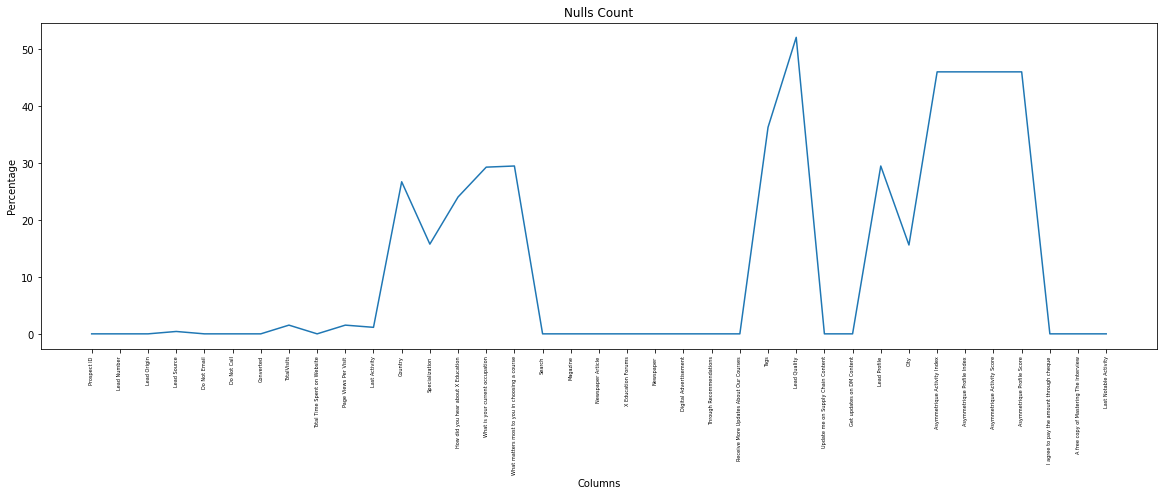

In [9]:
plt.figure(figsize=[20,6])
plt.plot(nulls_count['columns'], nulls_count['%_nulls_count'])
plt.title('Nulls Count')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [10]:
# columns having nulls more than 5% and less than 40%
_tmp1 = nulls_tmp[(nulls_tmp['%_nulls_count'] < 40) & (nulls_tmp['%_nulls_count'] > 5)]
_tmp1

,columns,null_count,%_nulls_count
11,Country,1727,26.700680
12,Specialization,1019,15.754484
13,How did you hear about X Education,1554,24.025974
14,What is your current occupation,1893,29.267161
15,What matters most to you in choosing a course,1906,29.468151
24,Tags,2346,36.270872
28,Lead Profile,1906,29.468151
29,City,1009,15.599876


In [11]:
train[_tmp1['columns']].head()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City
1871,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,Ringing,Select,Select
6795,India,Select,Select,Unemployed,Better Career Prospects,NaN,Select,Other Cities
3516,NaN,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Select
8105,India,Services Excellence,Other,Unemployed,Better Career Prospects,Ringing,Select,Mumbai
3934,NaN,Select,Select,Unemployed,Better Career Prospects,NaN,Select,Select


In [12]:
round(train.isnull().sum()/train.shape[0] *100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.42
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.53
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.53
Last Activity                                     1.14
Country                                          26.70
Specialization                                   15.75
How did you hear about X Education               24.03
What is your current occupation                  29.27
What matters most to you in choosing a course    29.47
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
ecol=train.isnull().sum()
ecol=ecol[ecol.values>(0.2*len(ecol))]
len(ecol)


17

In [14]:
# remove data those are not affected in the dataset 
ecol = list(ecol[ecol.values>=0.3].index)
train.drop(labels=ecol,axis=1,inplace=True) #drop function for removing blankdata
print(len(ecol))

17


In [15]:
# check percentage null values

train.isnull().sum()/len(train)*100


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
Total Time Spent on Website                 0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

In [16]:
# Searching for the column  null values

train.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through cheque    0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [30]:
train.shape

(6468, 20)

finding null values, data types and variables value counts

In [17]:
# Mapping few columns with their actual value

def map_data(data_frame):
    """
    This function does the required mapping on the data. e.g. map the season
    data to its actual value etc.
    
    Mapping is applied on season, yr, weathersit, mnth and weekday columns.
    
    @param data_frame: Data Frame
    @return: Data Frame with mapped data.
    """
    
    # season: 
    season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
    data_frame['season'] = data_frame['season'].map(season_map)

    # yr: 
    yr_map = {0: 2018, 1:2019}
    data_frame['yr'] = data_frame['yr'].map(yr_map)

    # weathersit: 
    # 1: Clear, Few clouds, Partly cloudy, Partly cloudy -- using "CFPP" as alias
    # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -- using "MCMBMFM" as alias
    # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -- using "LLTSLS" as alias
    # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -- usin "HITMSF" as alias
    weathersit_map = {1: 'CFPP', 2: 'MCMBMFM', 3: 'LLTSLS', 4: 'HITMSF'}
    data_frame['weathersit'] = data_frame['weathersit'].map(weathersit_map)

    # mnth:
    mnth_map = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
    data_frame['mnth'] = data_frame['mnth'].map(mnth_map)
    
    # weekday
    weekday_map = {1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday', 0: 'sunday'}
    data_frame['weekday'] = data_frame['weekday'].map(weekday_map)
    
    return data_frame


def sanity_check(data_frame):
    """
    This function helps to perform basic sanity check on the data
    
    @param data_frame: Data Frame
    """
    # Check whether 'mnth' field has correct month information or not
    assert not (data_frame['dteday'].apply(lambda x: x.strftime('%b').lower()) 
                != data_frame['mnth']).any(), "'mnth' field has incorrect month information"

    
    # Check whether 'weekday' field has correct information or not
    # calendar.weekday() output looks like (0-6: Mon-Sun) and in the given data the convention is (0-6: Sun-Sat). Hence, doing the needful to map
    weekday_map = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
    data_frame['weekday_computed'] = data_frame['dteday'].apply(lambda x: weekday_map[calendar.weekday(x.year, x.month, x.day)]) 
    assert not (data_frame['weekday_computed'] != data_frame['weekday']).any(), "'weekday' field has incorrect information"
    
    # Check whether 'yr' field has correct information or not
    assert not (data_frame['dteday'].apply(lambda x: x.year) != data_frame['yr']).any(), "'yr' field has incorrect information"

In [18]:
def process(data_frame):
    """
    This function helps to do the required clean up on the data. It
    remove instant, casual and registered fields, perform data mapping
    and sanity check.
    
    @param data_frame: Data Frame.
    @return: Cleaned data frame.
    """
    data_frame.reset_index(drop=True, inplace=True)
    data_frame.drop('instant', axis=1, inplace=True)
    data_frame.drop('casual', axis=1, inplace=True)
    data_frame.drop('registered', axis=1, inplace=True)
    
    data_frame_mapped = map_data(data_frame.copy())
    data_frame_mapped['dteday'] = data_frame_mapped['dteday'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').date())
    sanity_check(data_frame_mapped.copy())
        
    return data_frame_mapped

In [22]:
#Country Variable
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [23]:
# specialization variable
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
#"What is your current occupation" Variable
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#"What matters most to you in choosing a course" Variable
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
#"Last Activity Variable
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
# lead Source Variable
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64